In [ ]:
#probl:famous mall-build a system that can cluster customers in groups
#for better analysis of customer 

In [ ]:
#customer data
#process the data
#analysize the data
#optimal number of clusters
#k-means clustering of data
#visualizing the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data for practise/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#annual income in 1000 dollars
#spending score

In [ ]:
#finding the number of rows and column
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#annual income and spending score features are selected

In [ ]:
x=data.iloc[:,[3,4]].values

In [ ]:
x

In [ ]:
#choosing no.of clusters
#WCSS:within clusters sum of squares
#elbow method

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


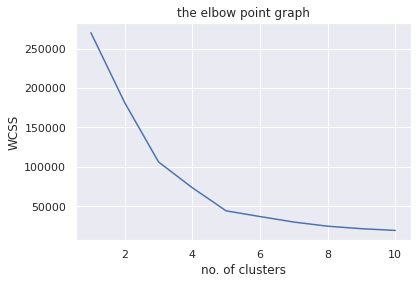

In [ ]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('the elbow point graph')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#we have 2 elbow points here we take 5,bcz after that there is no significance change

In [ ]:
#trainig the k-means clustering values
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label for each data point based on their cluster
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


total we have 5 clusters:0,1,2,3,4

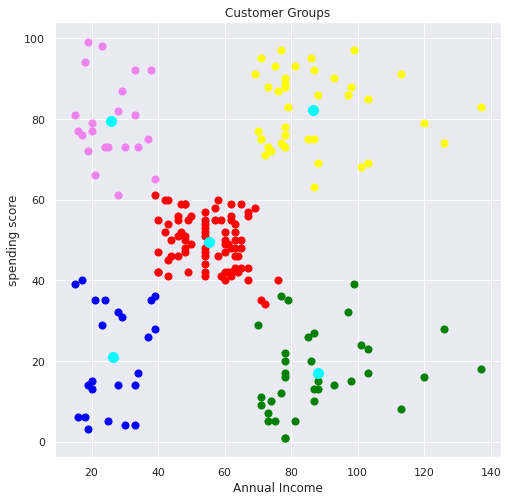

In [ ]:
#visualizing all the clusters
#plotting all the clusters and thier centroids

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='Cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.show()